# Text Module Example



In [1]:
import text_class_example

import sys
sys.path.append('..')
from pvops.text import utils

#import text2series_class_example  ; uncomment when completed
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\mwhopwo\AppData\Local\Programs\Python\Python36\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package punkt to C:\Users\mwhopwo\AppData\Loca
[nltk_data]     l\Programs\Python\Python36\lib\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Problem statements:

### 1. Text Preprocessing
Process the documents into concise, machine learning-ready documents. Additionally, extract dates from the text.

### 2. Text Classification
The written tickets are used to make an inference on the specified event descriptor.


## Text processing 

### Import text data

In [2]:
folder = 'example_data//'
filename = 'example_ML_ticket_data.csv'
df = pd.read_csv(folder+filename)
df.head(n=3)

,Date_EventStart,Date_EventEnd,Asset,CompletionDesc,Cause,ImpactLevel,randid
0,8/16/2018 9:00,8/22/2018 17:00,Combiner,cb 1.18 was found to have contactor issue woul...,0000 - Unknown.,Underperformance,38
1,9/17/2018 18:25,9/18/2018 9:50,Pad,self resolved. techdispatched: no,004 - Under voltage.,Underperformance,46
2,8/26/2019 9:00,11/5/2019 17:00,Facility,"all module rows washed, waiting for final repo...",0000 - Unknown,Underperformance,62


### Establish settings

Specify column names which will be used in this pipeline.

In [3]:
DATA_COLUMN = "CompletionDesc"   # Contains document
LABEL_COLUMN = "Asset"           # Establish event descriptor which will be inferenced by classifiers
DATE_COLUMN = 'Date_EventStart'  # Date of ticket (start date, end date; any reflective date will do), used in date extracting pipeline to replace information not specified in ticket

### Step 0: If needed, map raw labels to a cleaner set of labels

This step is 

In [4]:
asset_remap_filename = 'remappings_asset.csv'
REMAPPING_COL_FROM = 'in'
REMAPPING_COL_TO = 'out_'
remapping_df = pd.read_csv(folder+asset_remap_filename)

In [6]:
remapping_col_dict = {
    'attribute_col': LABEL_COLUMN,
    'remapping_col_from': REMAPPING_COL_FROM,
    'remapping_col_to': REMAPPING_COL_TO
}

df_remapped_assets = utils.remap_attributes(df.iloc[30:], remapping_df.iloc[20:], remapping_col_dict, allow_missing_mappings=True)

# df = df_remapped_assets

['energy meter', 'meter', 'energy storage/battery', 'facility', 'ac combiner', 'battery (solar + storage facilities)', 'block', 'central inverter', 'circuit', 'combiner box', 'das system', 'dc combiner', 'data logger', 'disconnect switch', 'inverter module', 'inverter module', 'inverter/string inverter', 'modules', 'other', 'pcs transformer', 'poi/medium voltage', 'pad', 'plant', 'point of interconnection', 'racking/trackers', 'rooftop pv system', 'site', 'string', 'string inverter', 'subarray', 'substation', 'summary', 'tracker control unit', 'tracking system']
Original attribute distribution:
inverter                  26
facility                  24
tracker                    6
combiner                   4
substation                 2
energy storage/battery     1
transformer                1
ground-mount pv system     1
summary                    1
meter                      1
string                     1
met station                1
pyranometer                1
Name: Asset, dtype: i

In [6]:
df[LABEL_COLUMN].value_counts()

facility          37
inverter          34
tracker            8
combiner           7
met station        3
substation         3
transformer        2
other              2
module             2
energy meter       1
energy storage     1
Name: Asset, dtype: int64

### Step 1: Establish example instance and render preliminary information about the tickets

In [7]:
# Establish the class object (found in text_class_example.py)
print(df[LABEL_COLUMN].value_counts())

e = text_class_example.Example(df, LABEL_COLUMN)
e.summarize_text_data(DATA_COLUMN)

facility          37
inverter          34
tracker            8
combiner           7
met station        3
substation         3
transformer        2
other              2
module             2
energy meter       1
energy storage     1
Name: Asset, dtype: int64


AttributeError: module 'pvops.text.utils' has no attribute 'summarize_text_data'

### Visualize timeseries of ticket publications

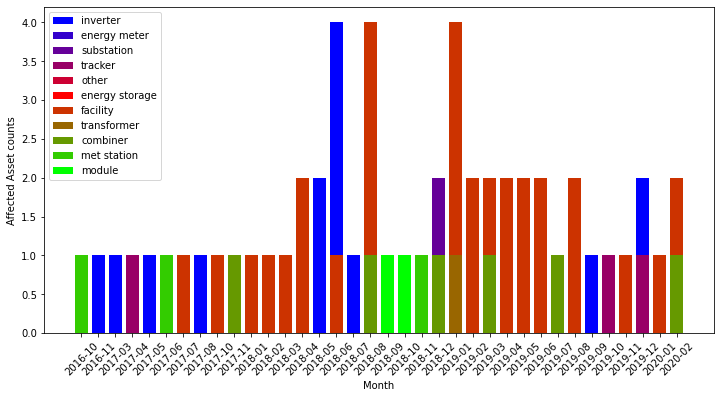

In [8]:
fig = e.visualize_attribute_timeseries(DATE_COLUMN)
plt.show()

### Functionality 1.1: Extract dates

In [9]:
# Extract date from ticket, if any. This framework is not 100% correct.
dates_df = e.extract_dates(DATA_COLUMN, DATE_COLUMN, SAVE_DATE_COLUMN='ExtractedDates')
dates_df

,CompletionDesc,ExtractedDates
0,cb 1.18 was found to have contactor issue woul...,[]
1,self resolved. techdispatched: no,[]
2,"all module rows washed, waiting for final repo...",[2019-09-01 09:00:00]
3,14 nov: we were alerted that e-c3-1 had faulte...,"[2017-11-14 07:46:00, 2017-03-01 07:46:00]"
4,assessed condition filters all inverters. litt...,[]
...,...,...
95,cleared cleared alert however psi is -3 invert...,[2016-11-03 09:28:00]
96,c4 closed remotely. techdispatched: no,[]
97,pure power fixed damaged source circuits did f...,"[2019-04-16 09:00:00, 2019-03-16 15:15:00]"
98,checked network connection to rm-1 didn't see ...,[]


### Functionality 1.2: Preprocess data for the Machine Learning classification

In [10]:
preprocessed_df = e.prep_data_for_ML(DATA_COLUMN, DATE_COLUMN)
preprocessed_df

,CompletionDesc,CleanDesc
0,inverter displayed ground fault. after resetti...,inverter displayed ground fault resetting brea...
1,c4 closed remotely.. techdispatched: no,closed remotely techdispatched
2,w/o trackers 1/25/19 morning check west: *w-b1...,w trackers morning check west row tracking wro...
3,all quarterly tasks have been completed. no is...,quarterly tasks completed issues discovered in...
4,this is redundant created by c4. i asked them ...,redundant created asked cancel obviously assig...
...,...,...
93,750. techdispatched: no,techdispatched
94,7/21/19 w/o 0287481 w-b10-1 upon arriving foun...,w w b upon arriving found inverter fault mode ...
95,"performed reset procedure is46 successfully, c...",performed reset procedure successfully connection
96,resolved,resolved


### Results of text processing

In [11]:
print("Pre-text processing")
e.summarize_text_data(DATA_COLUMN)

print("\nPost-text processing")
e.summarize_text_data('CleanDesc')

Pre-text processing
DETAILS
  98 samples
  0 invalid documents
  34.09 words per sample on average
  Number of unique words 1211
  3341.00 total words

Post-text processing
DETAILS
  98 samples
  0 invalid documents
  20.76 words per sample on average
  Number of unique words 727
  2034.00 total words


### Visualizing entropy of clustering technique pre- and post- processing

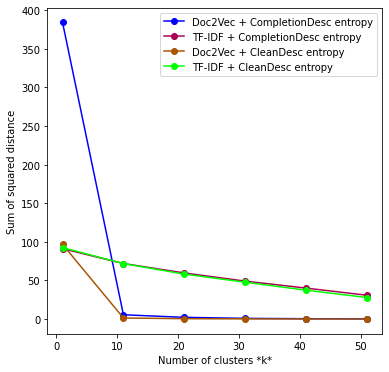

In [12]:
fig = e.visualize_cluster_entropy([DATA_COLUMN, 'CleanDesc'])
plt.show()

### Functionality 1.3: Frequency plot

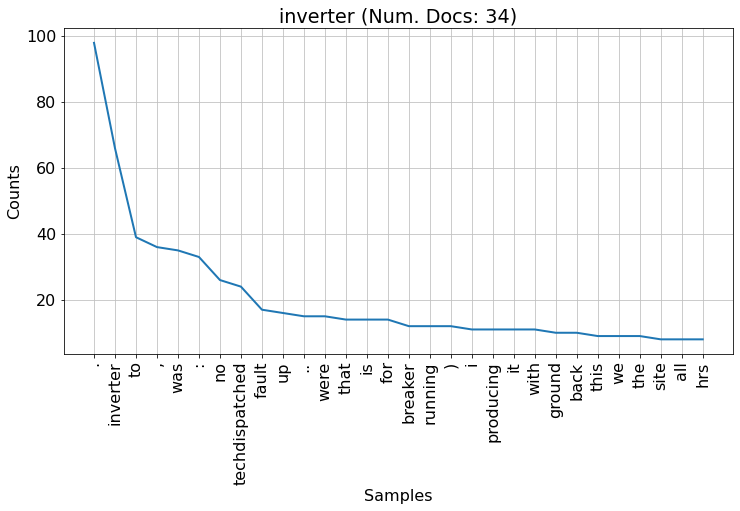

In [13]:
# Frequency plot on unprocessed data
fig = e.visualize_freqPlot(LBL_CAT='inverter', DATA_COLUMN=DATA_COLUMN)
plt.show()

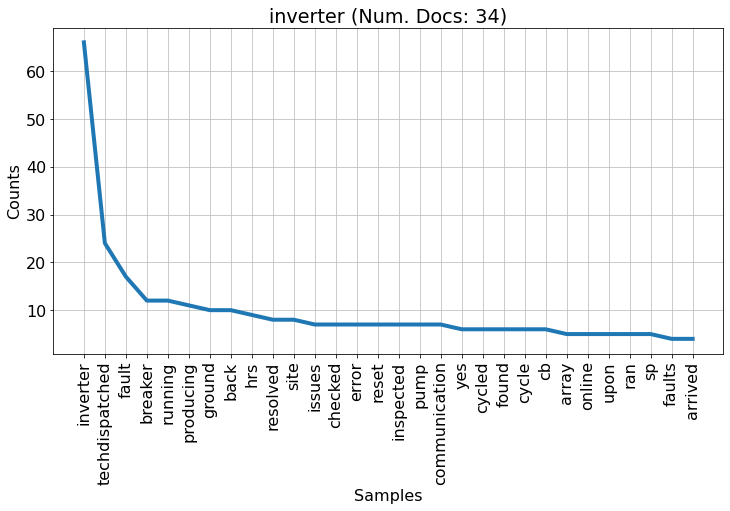

In [14]:
# Frequency plot on processed data
fig = e.visualize_freqPlot(LBL_CAT='inverter',
                            # Optional, kwargs into nltk's FreqDist
                            graph_aargs = {
                                'linewidth':4
                            }
                        )
plt.show()

### Hint: Use the below code to visualize frequency plots for all assets
    
    set_labels = list(set(e.df[e.LABEL_COLUMN].tolist()))
    for lbl in set_labels:
        fig = e.visualize_freqPlot(LBL_CAT=lbl)
        plt.show()

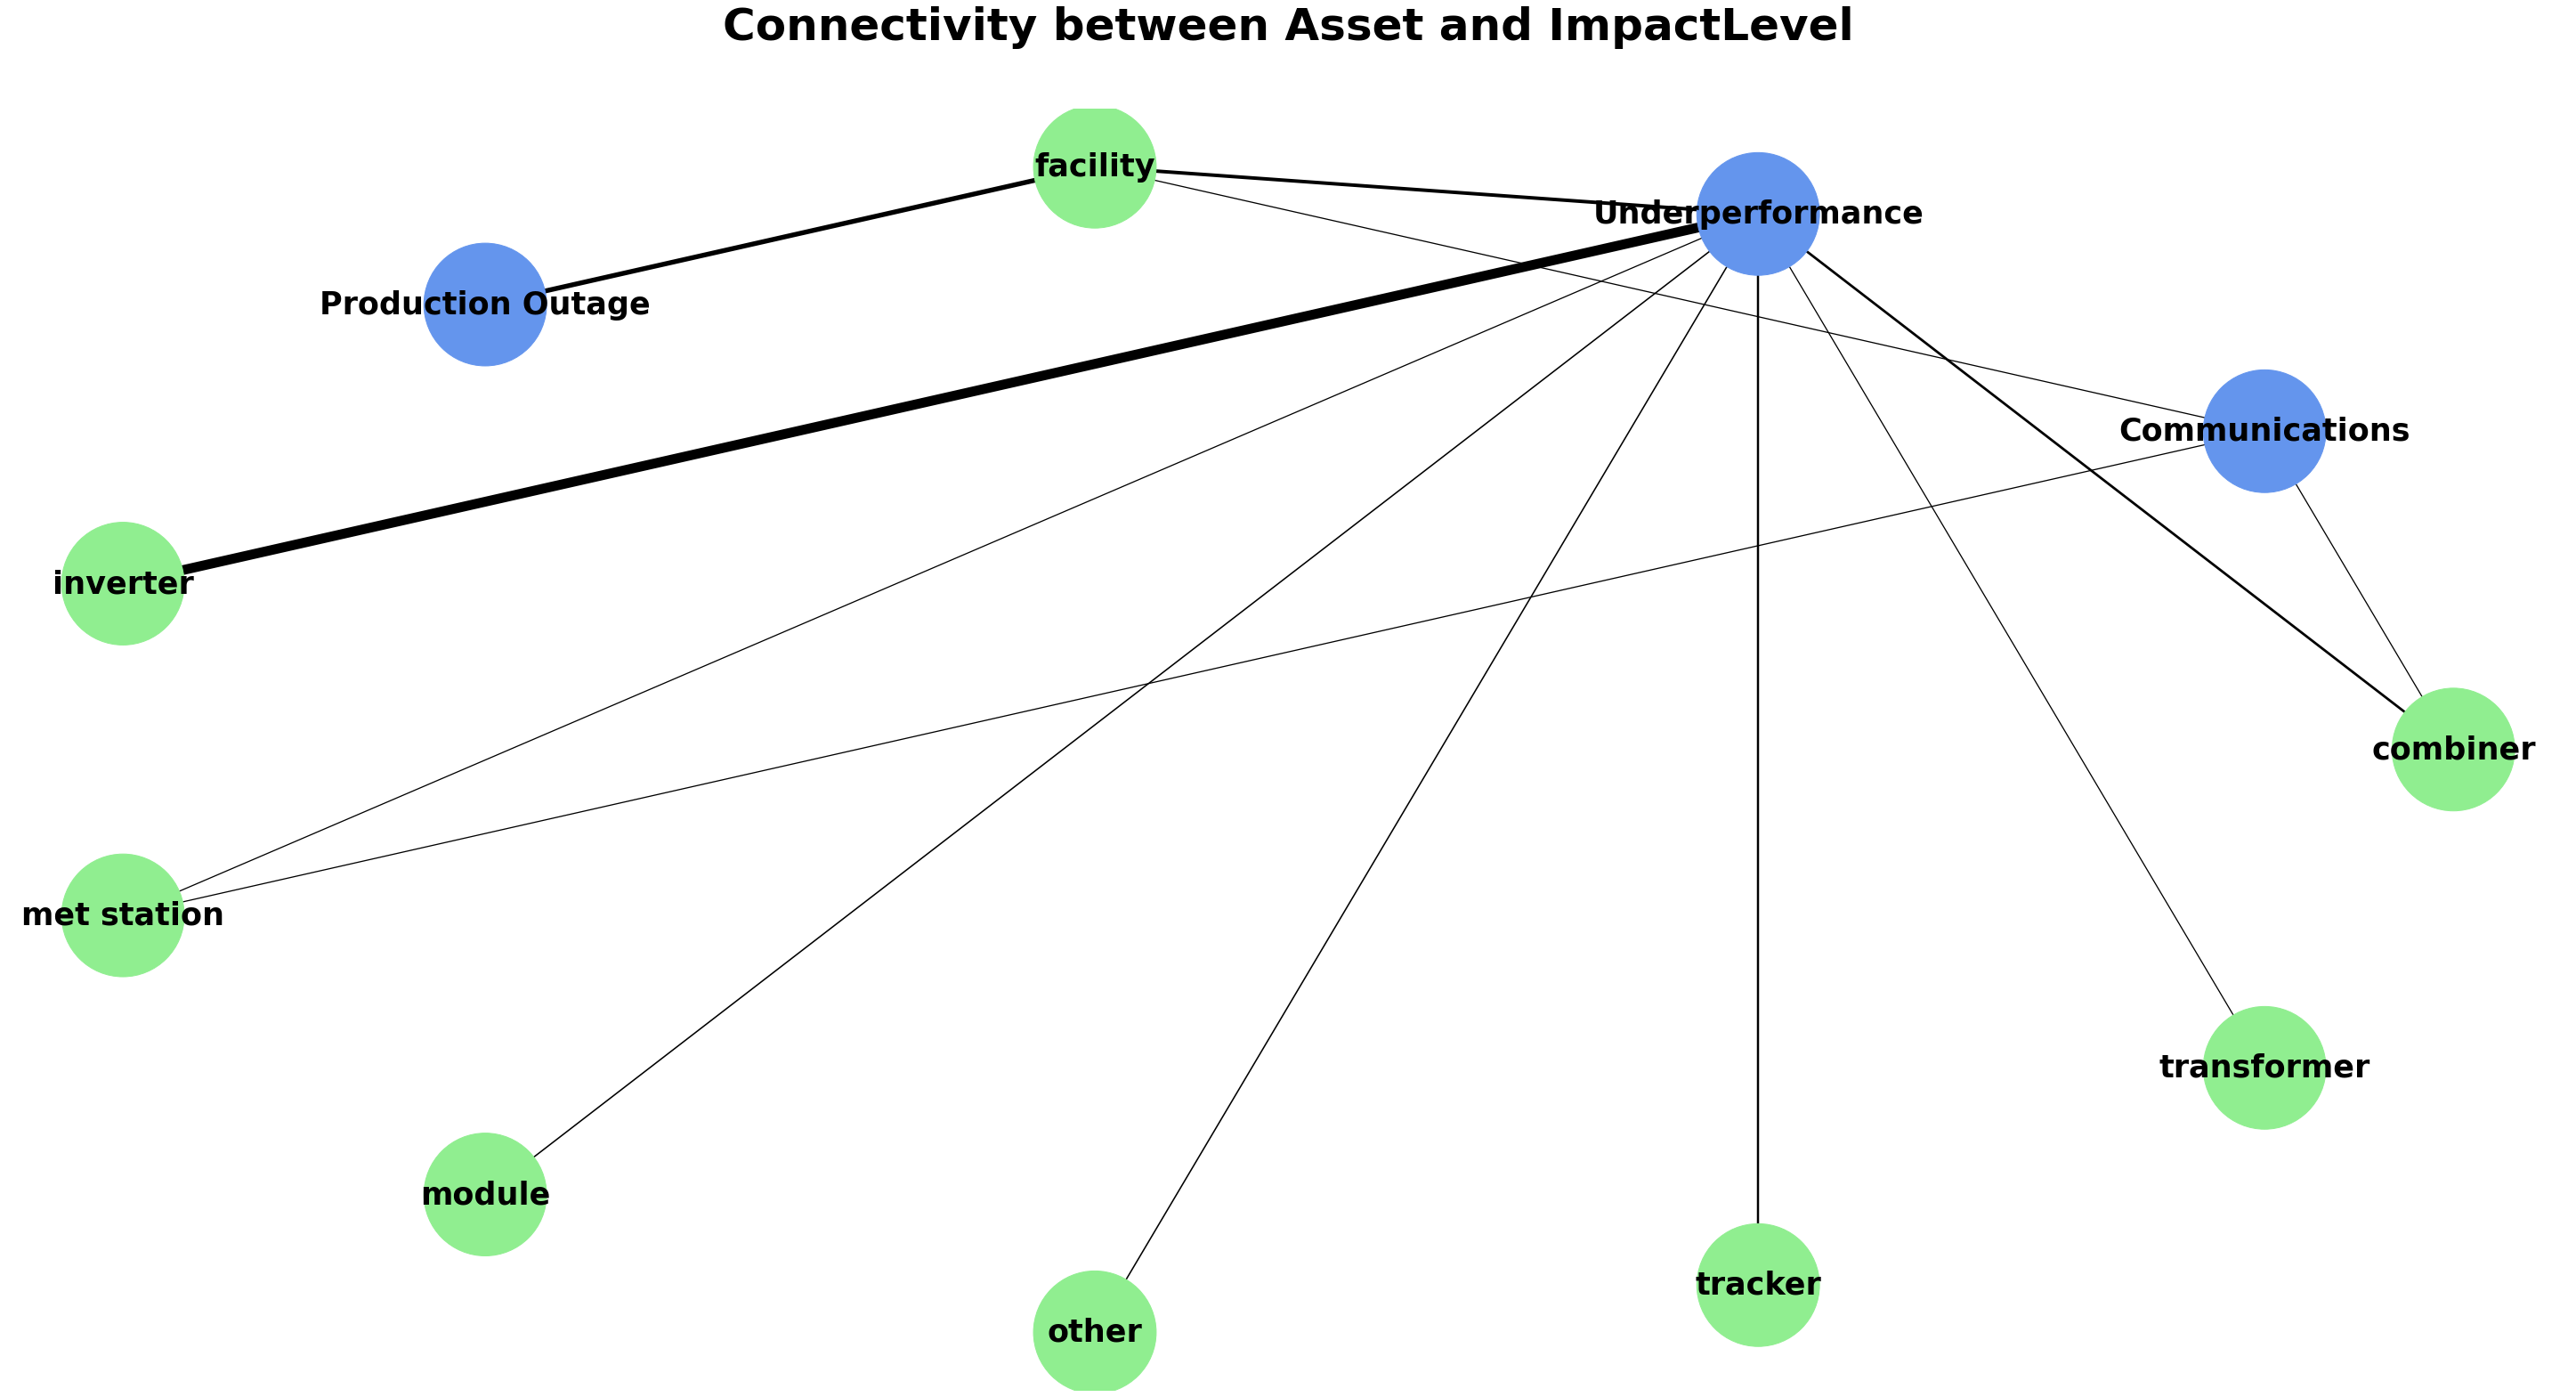

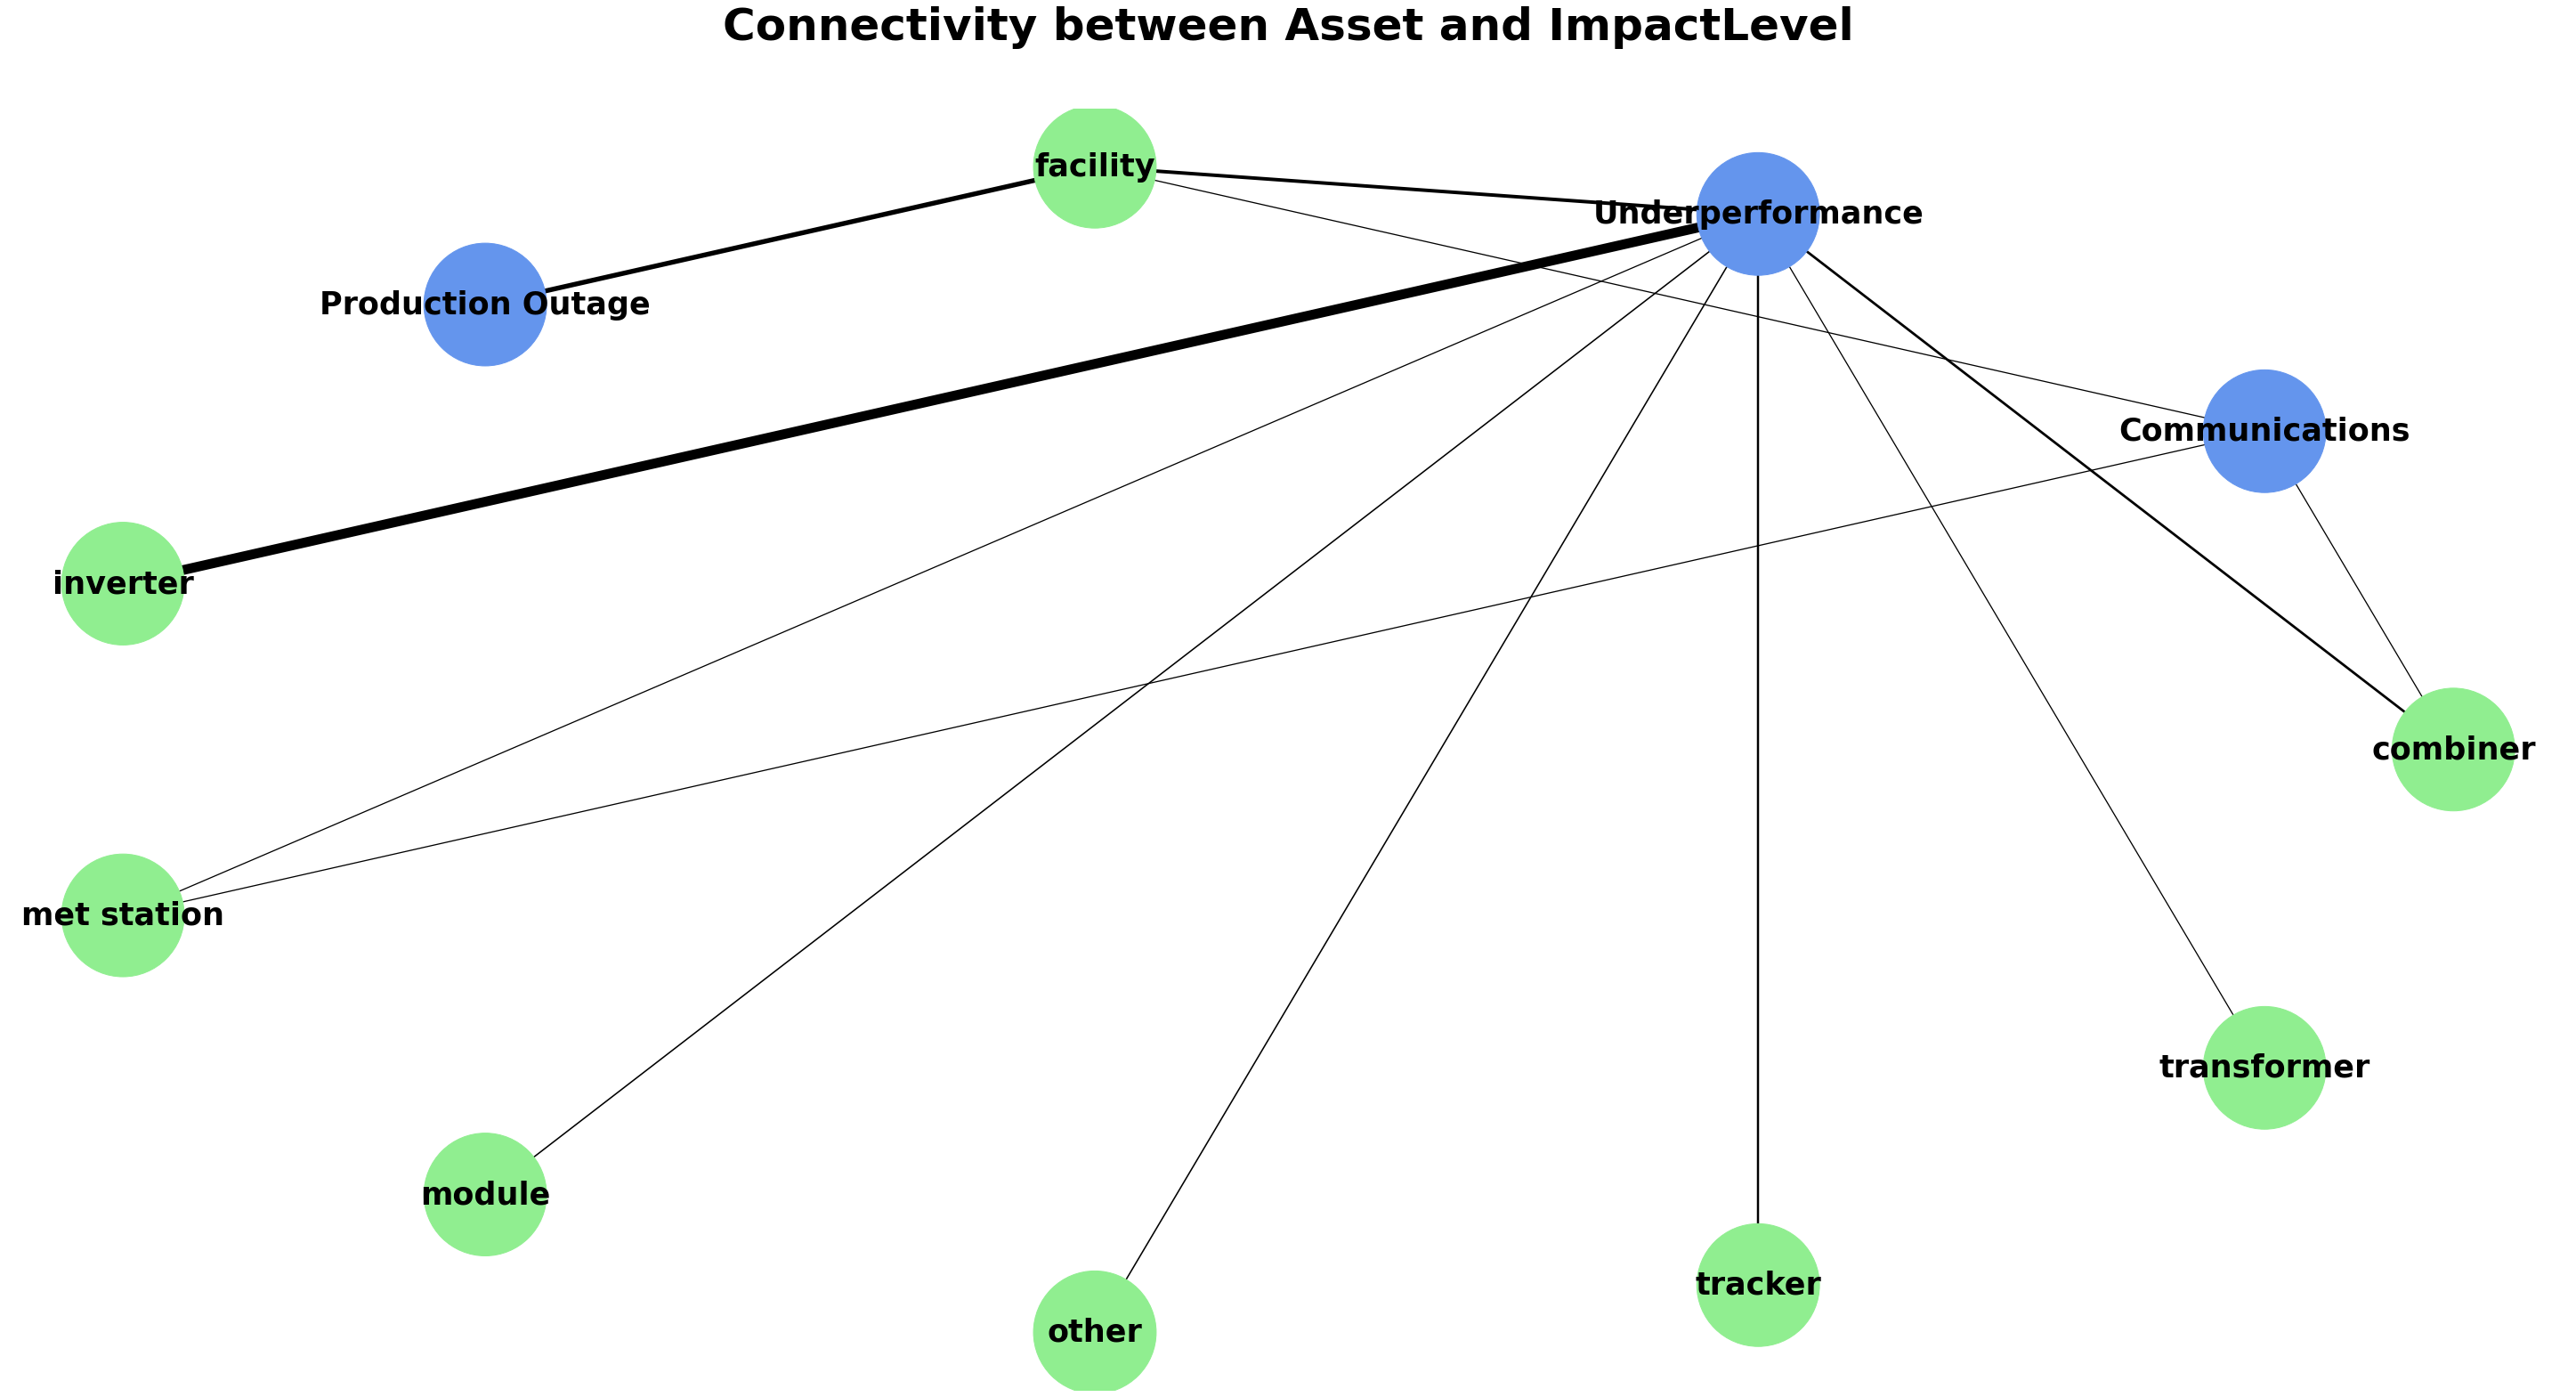

In [15]:
# Only supports two attributes
om_col_dict = {
    'attribute1_col': 'Asset',
    'attribute2_col': 'ImpactLevel'
}

fig,edges = e.visualize_attribute_connectivity(om_col_dict,
            # Optional
            graph_aargs = {'with_labels':True,
                            'font_weight':'bold',
                            'node_size':19000,
                            'font_size':35}
)
plt.show()

fig,edges = e.visualize_attribute_connectivity(om_col_dict,
            # Optional
            graph_aargs = {'with_labels':True,
                            'font_weight':'bold',
                            'node_size':19000,
                            'font_size':35}
    )
plt.show()

### Functionality 2.1: Conduct supervised classification on tickets using a cross-validated grid search

In [22]:
# Setting few cross validation splits because of few example data
results, best_model = e.classify_supervised(n_cv_splits=2, embedding='tfidf')
print('best_model', best_model)
results

Starting ML analysis with TF-IDF embeddings
C:\Users\mwhopwo\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\mwhopwo\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\mwhopwo\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\mwhopwo\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less 

,estimator,min_score,mean_score,max_score,std_score,mean_fit_time,clf__C,clf__max_iter,tfidf__ngram_range,tfidf__stop_words,...,clf__alpha,clf__batch_size,clf__hidden_layer_sizes,clf__learning_rate,clf__solver,clf__loss,clf__normalize,clf__n_estimators,clf__max_samples,clf__algorithm
53,SGDClassifier,0.33147,0.341572,0.351674,0.0101021,0.0279318,NaN,NaN,"(1, 3)",None,...,0.001,NaN,NaN,NaN,NaN,squared_hinge,NaN,NaN,NaN,NaN
38,LogisticRegression,0.300976,0.330202,0.359428,0.0292263,0.0922515,10000,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,sag,NaN,NaN,NaN,NaN,NaN
23,LogisticRegression,0.273574,0.317639,0.361704,0.0440649,0.0876062,59.9484,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,sag,NaN,NaN,NaN,NaN,NaN
37,LogisticRegression,0.273574,0.317639,0.361704,0.0440649,0.301916,10000,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,lbfgs,NaN,NaN,NaN,NaN,NaN
36,LogisticRegression,0.273574,0.317639,0.361704,0.0440649,0.232519,10000,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,newton-cg,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,SVC,0.0963533,0.103805,0.111257,0.00745206,0.0239366,1,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SVC,0.0963533,0.103805,0.111257,0.00745206,0.0209444,1,NaN,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,LinearSVC,0.0963533,0.103805,0.111257,0.00745206,0.0154561,0.01,800,"(1, 3)",None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,AdaBoostClassifier,0.0849661,0.0914626,0.0979592,0.00649654,0.303689,NaN,NaN,"(1, 3)",None,...,NaN,NaN,NaN,1,NaN,NaN,NaN,50,NaN,SAMME.R


### Functionality 1.4: Conduct unsupervised clustering  on tickets using a cross-validated grid search

In [24]:
# Setting few cross validation splits because of few example data
results, best_model = e.classify_unsupervised(n_cv_splits=2, embedding='tfidf')
print('best_model', best_model)
results

Starting ML analysis with TF-IDF embeddings
C:\Users\mwhopwo\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)
best_model Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('to_dense', DataDensifier()), ('clf', Birch(n_clusters=9))])


,estimator,min_score,mean_score,max_score,std_score,mean_fit_time,clf__damping,clf__max_iter,tfidf__ngram_range,tfidf__stop_words,clf__branching_factor,clf__n_clusters,clf__threshold,clf__init,clf__n_init,clf__bandwidth,clf__bin_seeding
7,Birch,0.351172,0.357313,0.363455,0.00614151,0.0992346,NaN,NaN,"(1, 3)",None,100,9,0.5,NaN,NaN,NaN,NaN
4,Birch,0.351172,0.357313,0.363455,0.00614151,0.104221,NaN,NaN,"(1, 3)",None,50,9,0.5,NaN,NaN,NaN,NaN
2,AffinityPropagation,0.309822,0.336025,0.362228,0.0262027,0.0663224,0.9,200,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AffinityPropagation,0.309822,0.336025,0.362228,0.0262027,0.0628322,0.9,600,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,AffinityPropagation,0.289205,0.291633,0.294061,0.00242784,0.0593419,0.5,200,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AffinityPropagation,0.289205,0.291633,0.294061,0.00242784,0.0573471,0.5,600,"(1, 3)",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,KMeans,0.199513,0.233958,0.268402,0.0344443,0.995625,NaN,NaN,"(1, 3)",None,NaN,9,NaN,random,100,NaN,NaN
13,KMeans,0.130533,0.228494,0.326455,0.0979608,0.131648,NaN,NaN,"(1, 3)",None,NaN,9,NaN,random,10,NaN,NaN
14,KMeans,0.162886,0.221021,0.279156,0.058135,0.579951,NaN,NaN,"(1, 3)",None,NaN,9,NaN,random,50,NaN,NaN
12,KMeans,0.151478,0.218349,0.285221,0.0668718,2.06755,NaN,NaN,"(1, 3)",None,NaN,9,NaN,k-means++,100,NaN,NaN


In [23]:
e.predict_best_model(ml_type = 'supervised')

Best algorithm found:
 Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('clf', SGDClassifier(alpha=0.001, loss='squared_hinge'))])
Predictions stored to Supervised_Pred_Unsupervised_Pred_Asset in `df` attribute
Score: 0.989703322345272


In [25]:
e.predict_best_model(ml_type = 'unsupervised')

Best algorithm found:
 Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('to_dense', DataDensifier()), ('clf', Birch(n_clusters=9))])
Predictions stored to Unsupervised_Pred_Unsupervised_Pred_Asset in `df` attribute
Score: 0.2797842732131148


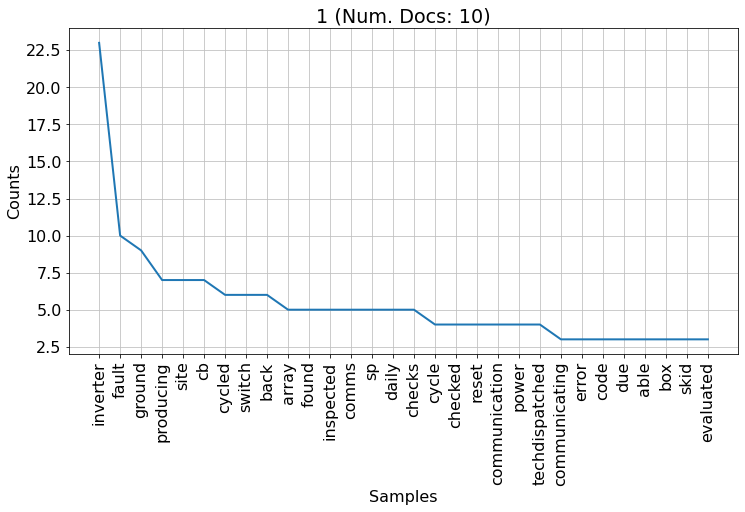

FreqDist({'inverter': 23, 'fault': 10, 'ground': 9, 'producing': 7, 'site': 7, 'cb': 7, 'cycled': 6, 'switch': 6, 'back': 6, 'array': 5, ...})

In [26]:
e.LABEL_COLUMN = 'Unsupervised_Pred_Asset'
e.visualize_freqPlot(LBL_CAT = 1)

## Visualize Word Clusters

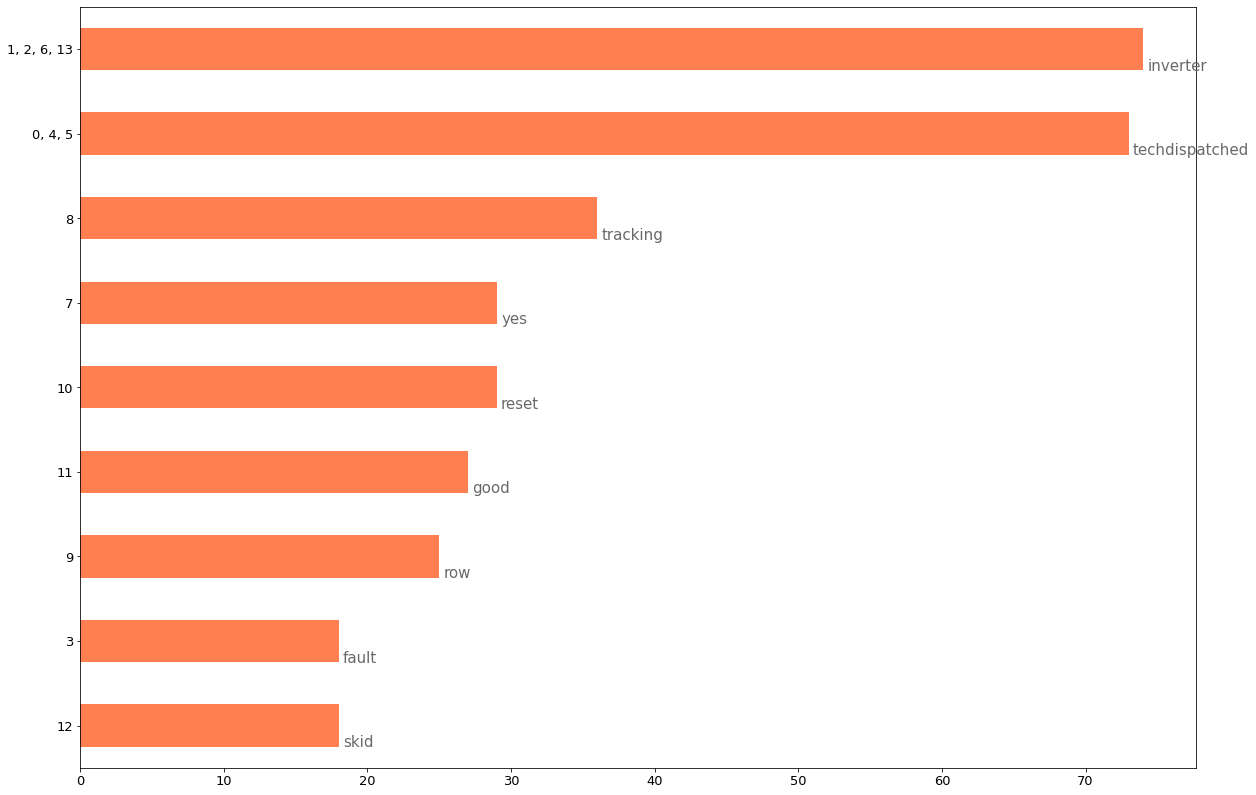

In [27]:
fig = e.visualize_document_clusters(min_frequency=10, DATA_COLUMN='CleanDesc')
plt.show()

### Seeing the popularity of `techdispatched`, one might consider adding `techdispatched` to the stopwords list